In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Thu, 07 Dec 2023 11:55


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format
index_map = {0:'Rest', 1:'City of SeaTac', 'All':'All', 'TOTAL':'TOTAL'}

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"28,356,427","29,139,376","782,949",2.76%
Arterial,"25,790,307","23,942,900","-1,847,407",-7.16%
Collector,"4,390,283","3,679,528","-710,755",-16.19%
Ramp,"756,602","609,154","-147,448",-19.49%
Total,"59,293,619","57,370,958","-1,922,661",-3.24%


#### Daily | By Facility Type - City of SeaTac

In [6]:
df1 = df[df['subarea_flag']==1]

In [7]:
_df = df1.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df = _df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total']).fillna(0)
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/np.maximum(_df['observed'],1)
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"1,253,278","1,153,321","-99,957",-7.98%
Arterial,0,0,0,0.00%
Collector,0,0,0,0.00%
Ramp,0,0,0,0.00%
Total,"1,253,278","1,153,321","-99,957",-7.98%


#### Daily | By Facility Type - Other Counties

In [8]:
df2 = df[df['subarea_flag'] != 1]

In [9]:
_df = df2.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"27,103,149","27,986,055","882,906",3.26%
Arterial,"25,790,307","23,942,900","-1,847,407",-7.16%
Collector,"4,390,283","3,679,528","-710,755",-16.19%
Ramp,"756,602","609,154","-147,448",-19.49%
Total,"58,040,341","56,217,637","-1,822,704",-3.14%


----
### Daily | By County

In [10]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,190,923","31,216,360","25,437",0.08%
Kitsap,"4,567,541","3,679,111","-888,430",-19.45%
Pierce,"13,935,248","13,108,084","-827,164",-5.94%
Snohomish,"9,599,907","9,367,403","-232,504",-2.42%
Total,"59,293,619","57,370,958","-1,922,661",-3.24%


---
### City of SeaTac

In [11]:
index_map = {0:'Other', 1:'City of SeaTac'}
_df = df.groupby('subarea_flag').sum()[['observed','modeled']]
_df = _df.sort_index(ascending=False)
_df.index = _df.index.map(index_map)
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
subarea_flag,,,,
City of SeaTac,"1,253,278","1,153,321","-99,957",-7.98%
Other,"58,040,341","56,217,637","-1,822,704",-3.14%
Total,"59,293,619","57,370,958","-1,922,661",-3.24%


----
### Daily | Scatterplots 

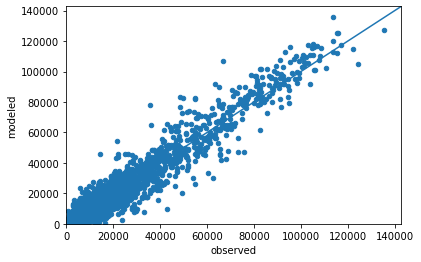

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.964061337328953


---
By County

King r^2: 0.9739052617070796


Kitsap r^2: 0.9343791888031735


Pierce r^2: 0.9622784198284274
Snohomish r^2: 0.9358123865183647


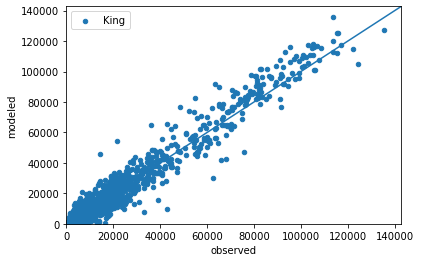

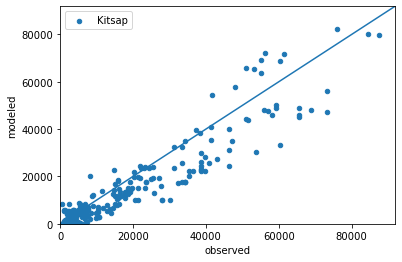

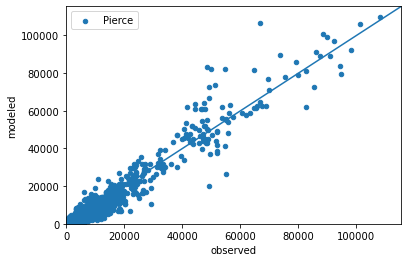

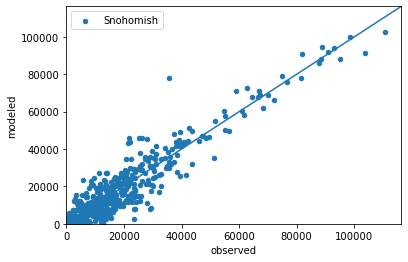

In [14]:
for county in np.unique(df[~df.county.isna()]['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

#### City of SeaTac

Other r^2: 0.9641220994671963
City of SeaTac r^2: 0.9323316677979204


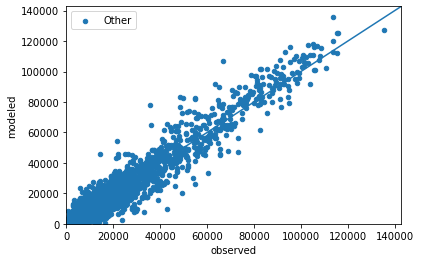

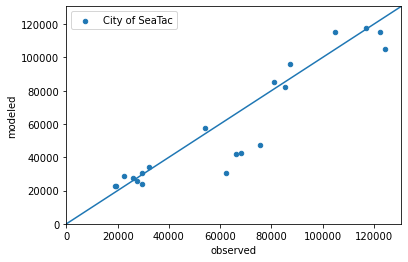

In [15]:
subarea_names = ['Other', 'City of SeaTac']
for county in np.unique(df[~df.county.isna()]['subarea_flag']):
    _df = df[df['subarea_flag'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=str(subarea_names[int(county)]))
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(subarea_names[int(county)]) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.939075209423868
r^2 Arterial: 0.8519012328173324


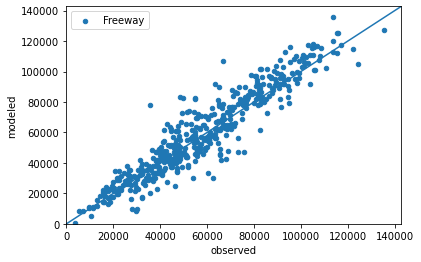

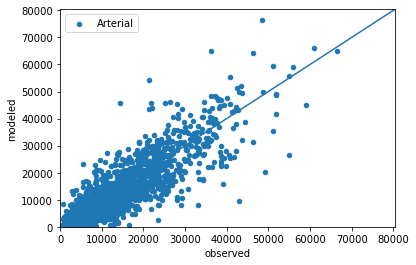

In [16]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - City of SeaTac

r^2 Freeway: 0.9323316677979204


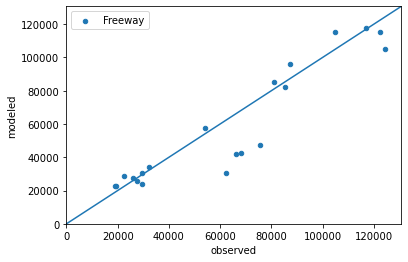

In [17]:
df1 = df[df['subarea_flag'] == 1]
for factype in ['Freeway']: #,'Arterial']:
    _df = df1[df1['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - Other Counties

r^2 Freeway: 0.9413703463133802
r^2 Arterial: 0.8519012328173324


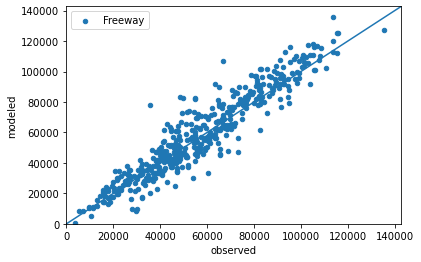

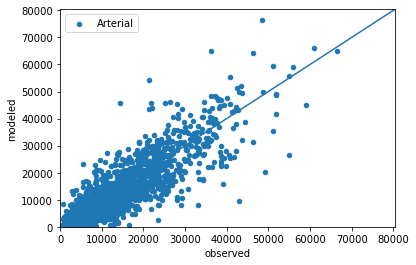

In [18]:
df2 = df[(df['subarea_flag'] != 1) & (~df.county.isna())]
if df2.shape[0] > 0:
    for factype in ['Freeway','Arterial']:
        _df = df2[df2['@facilitytype'] == factype]
        ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
        lim = _df[['observed','modeled']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
        print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.9276905707523199


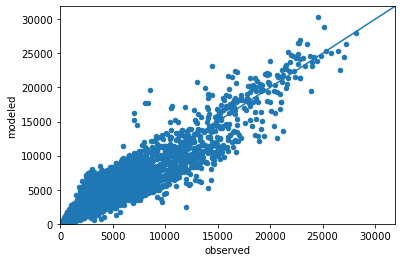

In [19]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - City of SeaTac**

r^2: 0.9139732798385508


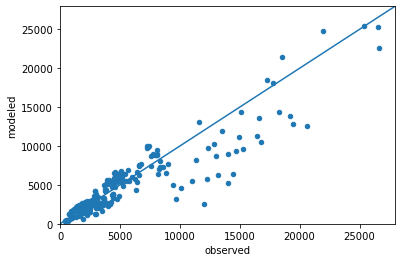

In [20]:
df1 = df[df['subarea_flag'] == 1]
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df1[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - Other**

r^2: 0.9295793124509367


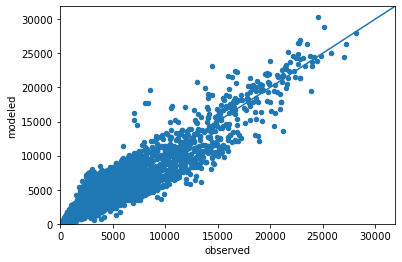

In [21]:
df2 = df[df['subarea_flag'] != 1]
ax = df2.plot(kind='scatter', x='observed', y='modeled')
lim = df2[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,subarea_flag,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","563,903",King,0,"-4,514",-0.79%
1,KENT,"550,322","257,089",King,1,"-293,233",-53.28%
2,KENT,"550,322","293,040",King,0,"-257,282",-46.75%
3,SEATTLE - SOUTH OF CBD,"526,500","542,357",King,0,"15,857",3.01%
4,SHIP CANAL,"519,802","574,818",King,0,"55,016",10.58%
5,KIRKLAND-REDMOND,"414,120","415,900",King,0,"1,780",0.43%
6,MILL CREEK,"400,848","411,440",King,0,"10,592",2.64%
7,SOUTH BELLEVUE,"399,500","384,793",King,0,"-14,707",-3.68%
8,SEATTLE - NORTH,"372,000","393,091",King,0,"21,091",5.67%
9,TACOMA - EAST OF CBD,"312,164","346,126",Pierce,0,"33,962",10.88%


r^2 : 0.9010027889121143


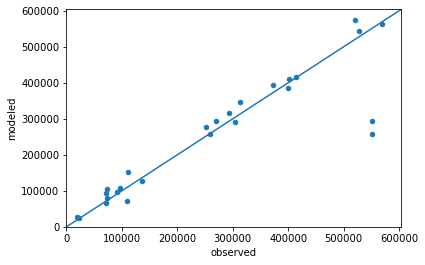

In [23]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - City of Seatac

In [24]:
df1 = df[(df['subarea_flag'] == 1) & (df['name']!='KENT')].drop(columns='subarea_flag')
df1 = df1.append(df1.sum(numeric_only=True), ignore_index=True)
df1.at[df1.index[-1], 'name'] = 'TOTAL'
#df1.at['C', 'name'] = 10
df1['percent_diff'] = df1['diff']/df1['observed']
df1[['percent_diff']] = df1[['percent_diff']].applymap(format_percent)
df1

,name,observed,modeled,county,diff,percent_diff
0,SEATAC,"73,635","103,694",King,"30,059",40.82%
1,TOTAL,"73,635","103,694",NaN,"30,059",40.82%


r^2 : 0.0


C:\Users\aditya.gore\.conda\envs\seatac_summary\lib\site-packages\scipy\stats\_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\aditya.gore\.conda\envs\seatac_summary\lib\site-packages\scipy\stats\_stats_mstats_common.py:174: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\aditya.gore\.conda\envs\seatac_summary\lib\site-packages\scipy\stats\_stats_mstats_common.py:176: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


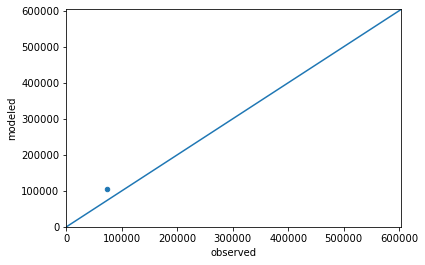

In [25]:
df1 = df1.head(-1)
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - Other

In [26]:
df2 = df[(df['subarea_flag'] != 1) | (df['name']=='KENT')].drop(columns='subarea_flag').groupby(['name','county'],as_index=False).agg({'observed':'first','modeled':'sum'})
df2['diff'] = df2['modeled']-df2['observed']
df2 = df2.append(df2.sum(numeric_only=True), ignore_index=True)
df2.at[df2.index[-1], 'name'] = 'TOTAL'
#df2.at['C', 'name'] = 10
df2['percent_diff'] = df2['diff']/df2['observed']
df2[['percent_diff']] = df2[['percent_diff']].applymap(format_percent)
df2

,name,county,observed,modeled,diff,percent_diff
0,AGATE PASS BRIDGE,Kitsap,"22,000","23,668","1,668",7.58%
1,AUBURN - SOUTH KING,King,"568,417","563,903","-4,514",-0.79%
2,BOTHELL,King,"293,729","315,844","22,115",7.53%
3,CROSS SOUND,Kitsap,"18,530","27,394","8,864",47.84%
4,GIG HARBOR,Pierce,"71,040","94,844","23,804",33.51%
5,KENT,King,"550,322","550,129",-193,-0.04%
6,KIRKLAND-REDMOND,King,"414,120","415,900","1,780",0.43%
7,LYNNWOOD-BOTHELL,King,"269,900","292,793","22,893",8.48%
8,MAPLE VALLEY,King,"71,874","66,596","-5,278",-7.34%
9,MILL CREEK,King,"400,848","411,440","10,592",2.64%


r^2 : 0.9941538405864512


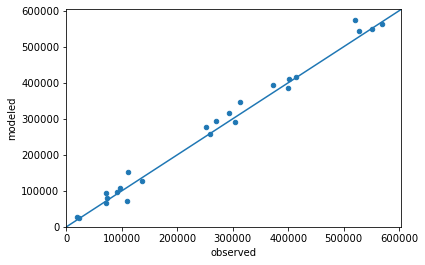

In [27]:
df2 = df2.head(-1)
if df2.shape[0] > 0:
    ax = df2.plot(kind='scatter', x='observed', y='modeled')
    lim = df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
    print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [28]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
sorted_values = df.sort_values('observed_5to20', ascending=False).agency.to_list() + ['TOTAL']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'agency'] = 'TOTAL'
df[['perc_diff']] = df['diff']/df['observed_5to20']
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.set_index('agency').reindex(sorted_values)

,observed_5to20,modeled_5to20,diff,perc_diff
agency,,,,
King County Metro,"392,694","384,572","-8,122",-2.07%
Sound Transit,"148,468","160,325","11,858",7.99%
Community Transit,"30,918","37,558","6,640",21.48%
Pierce Transit,"27,233","36,207","8,973",32.95%
Washington Ferries,"16,912","19,120","2,208",13.06%
Kitsap Transit,"8,669","22,572","13,903",160.37%
Everett Transit,"3,290","2,310",-981,-29.81%
TOTAL,"628,185","662,664","34,479",5.49%


----
### By Transit Routes servicing City of SeaTac

In [29]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_lines_seatac.csv')
df[['route_code']] = df[['route_code']].astype(int).astype('str')
df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df = df[['agency','route_code', 'description', 'observed_5to20','modeled_5to20','diff']]
sorted_values = df.sort_values(['agency','observed_5to20'], ascending=False).route_code.to_list() + ['TOTAL']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'agency'] = 'TOTAL'
df.at[df.index[-1], 'route_code'] = 'TOTAL'
df.at[df.index[-1], 'description'] = 'TOTAL'
df[['perc_diff']] = df['diff']/df['observed_5to20']
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.set_index('route_code').reindex(sorted_values)

,agency,description,observed_5to20,modeled_5to20,diff,perc_diff
route_code,,,,,,
6996,Sound Transit,LINK: SeaTac - Downt,"69,383","64,940","-4,443",-6.40%
6590,Sound Transit,590 Tacoma - Seattle,"2,656","5,240","2,584",97.29%
6577,Sound Transit,577 Federal Way - Se,"1,916","2,227",311,16.26%
6594,Sound Transit,594 Lakewood - Seatt,"1,828","4,053","2,226",121.78%
6574,Sound Transit,574 Lakewood - SeaTa,"1,768","2,708",940,53.20%
6578,Sound Transit,578 Puyallup - Seatt,"1,686","4,567","2,881",170.82%
6560,Sound Transit,560 Bellevue - Sea-T,"1,681","2,893","1,212",72.08%
6592,Sound Transit,592 Olympia/DuPont -,702,888,186,26.55%
6586,Sound Transit,586 Tacoma - U. Dist,472,74,-398,-84.33%


----
### By Transit Routes servicing Seattle Airport

In [30]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_lines_airport_seatac.csv')
df[['route_code']] = df[['route_code']].astype(int).astype('str')
df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df = df[['agency','route_code', 'description', 'observed_5to20','modeled_5to20','diff']]
sorted_values = df.sort_values(['agency','observed_5to20'], ascending=False).route_code.to_list() + ['TOTAL']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'agency'] = 'TOTAL'
df.at[df.index[-1], 'route_code'] = 'TOTAL'
df.at[df.index[-1], 'description'] = 'TOTAL'
df[['perc_diff']] = df['diff']/df['observed_5to20']
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.set_index('route_code').reindex(sorted_values)

,agency,description,observed_5to20,modeled_5to20,diff,perc_diff
route_code,,,,,,
6996,Sound Transit,LINK: SeaTac - Downt,"69,383","64,940","-4,443",-6.40%
6574,Sound Transit,574 Lakewood - SeaTa,"1,768","2,708",940,53.20%
6560,Sound Transit,560 Bellevue - Sea-T,"1,681","2,893","1,212",72.08%
1180,King County Metro,180 Auburn Station -,"3,911","6,642","2,731",69.83%
1156,King County Metro,156 Southcenter - Se,"1,027","1,295",268,26.06%
TOTAL,TOTAL,TOTAL,"77,770","78,477",707,0.91%


----
### Key Routes
#### Ferries

In [31]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
sorted_values = _df.sort_values('observed_5to20', ascending=False).description.to_list() + ['TOTAL']
_df = _df.append(_df.sum(numeric_only=True), ignore_index=True)
_df.at[_df.index[-1], 'description'] = 'TOTAL'
_df[['perc_diff']] = _df['diff']/_df['observed_5to20']
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,POF Seattle - West S,"1,356",460,-896,-66.08%
1,POF Seattle - Vashon,670,506,-163,-24.36%
2,WSF Kingston - Edmon,"1,732",716,"-1,016",-58.67%
3,WSF Bainbridge Islan,"8,857","13,164","4,307",48.63%
4,WSF Bremerton - Seat,"4,484","3,315","-1,170",-26.08%
5,WSF Fauntleroy - Sou,365,19,-346,-94.84%
6,WSF Vashon Island -,946,"1,333",387,40.91%
7,WSF Southworth - Vas,239,301,62,25.99%
8,WSF Point Defiance -,289,273,-16,-5.50%
9,TOTAL,"18,937","20,086","1,149",6.07%


r^2 : 0.9799526414152114


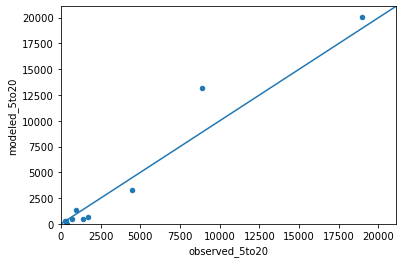

In [32]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [33]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
0,1973,POF West Seattle - S,897
1,1975,POF Vashon Island -,704
4,4202,POF Bremerton - Anna,666
3,4201,POF Bremerton - Pt O,641
2,4200,POF Seattle - Bremer,609
7,5003,WSF Bremerton - Seat,458
8,5005,WSF Vashon Island -,370
9,5006,WSF Southworth - Vas,313
10,5007,WSF Point Defiance -,282
6,5002,WSF Bainbridge Islan,259


#### Rail

In [34]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","64,940","-4,443",-6.40%
1,Sounder South,"15,356","17,818","2,462",16.04%
2,Sounder North,"1,667","2,229",562,33.72%


r^2 : 0.9988135813289482


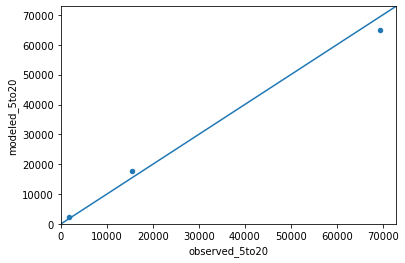

In [35]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [36]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,"15,336","14,019","-1,317",-8.58%
4,C Line RapidRide,"11,368","13,158","1,790",15.75%
1,KC Metro 40,"11,405","12,236",831,7.28%
10,Sound Transit 550,"9,168","11,293","2,125",23.18%
0,KC Metro 7,"10,150","10,237",87,0.86%
5,D Line RapidRide,"13,078","9,281","-3,797",-29.04%
2,A Line RapidRide,"8,522","8,427",-95,-1.11%
7,F Line RapidRide,"5,267","6,504","1,237",23.49%
3,B Line RapidRide,"5,914","5,377",-537,-9.07%
8,SLU Streetcar,"1,703","1,323",-380,-22.32%


r^2 : 0.914737447824045


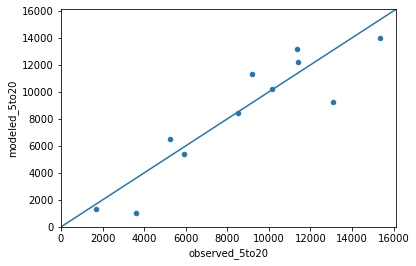

In [37]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.8732782281428594


r^2 Everett Transit: -0.34738696100803584
r^2 King County Metro: 0.9224252626251872
r^2 Kitsap Transit: 0.7926440221596495


r^2 Pierce Transit: 0.8833900080043707


r^2 Sound Transit: 0.9932406733395589
r^2 Washington Ferries: 0.9638315351306352


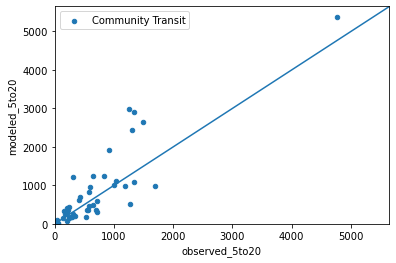

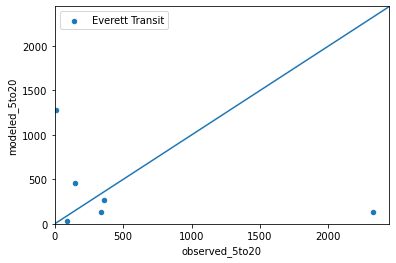

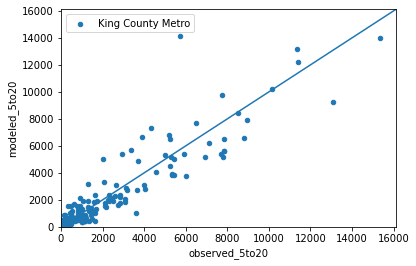

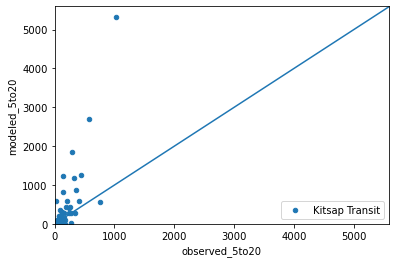

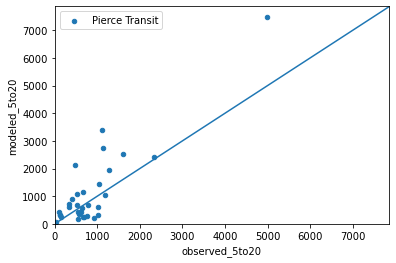

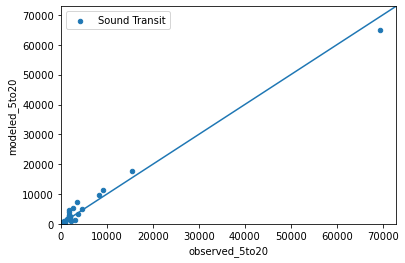

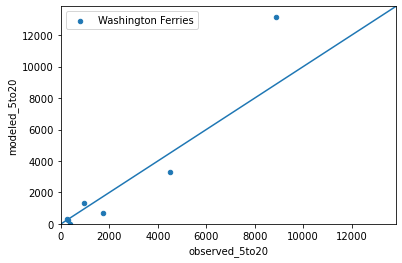

In [38]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
        lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [39]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","9,028",-388,-4.12%
Westlake,"10,904","7,249","-3,655",-33.52%
University St,"5,257","5,560",302,5.75%
Pioneer Square,"3,865","5,540","1,675",43.33%
Int'l District,"5,647","3,191","-2,456",-43.50%
Capitol Hill,"7,016","7,067",50,0.72%
Stadium,"1,912",799,"-1,113",-58.20%
SODO,"2,108","3,217","1,110",52.65%
Beacon Hill,"2,587","2,159",-428,-16.55%


Sound Transit Station Groupings

In [40]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","9,028",-388,-4.12%
Capitol Hill,"7,016","7,067",50,0.72%
Westlake/University St,"16,161","12,808","-3,353",-20.75%
Pioneer Square/Int'l District,"9,512","8,731",-782,-8.22%
Stadium/SODO,"4,020","4,016",-3,-0.08%
Beacon Hill/Mount Baker,"4,809","4,361",-449,-9.33%
Columbia City,"2,376","2,342",-34,-1.42%
Othello/Rainier Beach,"4,412","4,828",417,9.44%
Tukwila Int'l Blvd,"2,779","3,041",262,9.42%


# Stop Transfers

### Light Rail

In [41]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.39,-99.00,99.39,-100.39%
Westlake,0.43,0.36,0.07,18.30%
University St,0.56,0.20,0.36,182.42%
Pioneer Square,0.53,0.16,0.37,235.15%
Int'l District,0.72,0.45,0.27,60.49%
Capitol Hill,0.06,-99.00,99.06,-100.06%
Stadium,0.33,0.12,0.21,175.36%
SODO,0.44,0.31,0.12,39.19%
Beacon Hill,0.32,0.35,-0.03,-8.68%


# Externals

In [42]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","122,974","-7,026",-5.40%
I-5 to Mount Vernon,3744,Snohomish,"67,000","52,622","-14,378",-21.46%
I-90 @ Snoqualmie Pass,3739,King,"33,000","26,315","-6,685",-20.26%
SR-532 to Camano Island,3746,Snohomish,"23,000","19,064","-3,936",-17.11%
SR-507 to Yelm,3734,Pierce,"23,000","18,256","-4,744",-20.63%
SR-3 to Belfair,3749,Kitsap,"18,000","15,035","-2,965",-16.47%
Hood Canal Bridge,3748,Kitsap,"18,000","15,134","-2,866",-15.92%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","7,952","-1,148",-12.62%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","5,480",-820,-13.02%


# Corridor Speed

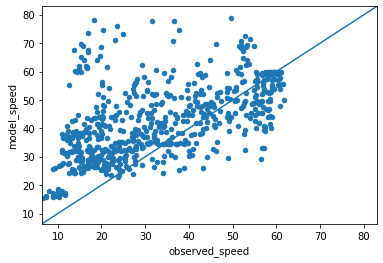

In [43]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
ax = df.plot(kind='scatter', y='model_speed', x='observed_speed')
maxlim = df[['observed_speed','model_speed']].max().max()*1.05
minlim = df[['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

## City of SeaTac

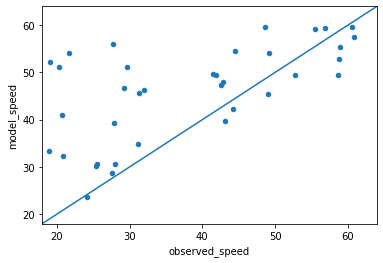

In [44]:
ax = df.loc[df.subarea_flag==1].plot(kind='scatter', y='model_speed', x='observed_speed')
maxlim = df.loc[df.subarea_flag==1][['observed_speed','model_speed']].max().max()*1.05
minlim = df.loc[df.subarea_flag==1][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

## Other Counties

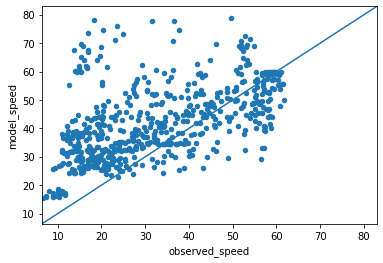

In [45]:
_df = df.loc[df.subarea_flag!=1]
_df = _df.groupby(['Corridor_Number', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda xdf: xdf.length*60/xdf.auto_time)
ax = _df.plot(kind='scatter', y='model_speed', x='observed_speed')
maxlim = _df[['observed_speed','model_speed']].max().max()*1.05
minlim = _df[['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

### AM Peak, Primary Corridors

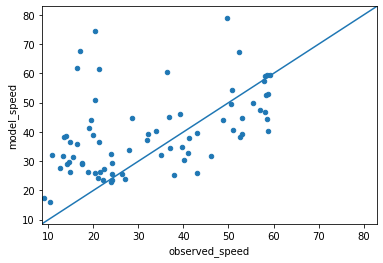

In [46]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
ax = df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [47]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
546,"SR 529/Broadway/State, 88th St NE to 41st St - SB",75,20
390,"56th Street/Cirque, Alaska to Bridgeport - WB",68,17
399,"56th Street/Cirque, Bridgeport to Alaska - EB",62,16
364,"15th Ave/Elliott, Western Ave to NW 80th St - NB",61,21
85,Tukwila to Bellevue - NB,51,20
299,"SR 522, I-405 to SR 2 - EB",79,50
453,"Bel-Red Road, 124th Ave NE to West Lk Samm - EB",38,13
516,"SR 169, Green Valley Rd to I-405 - NB",44,20
372,"23rd Ave, Rainier Ave S to SR 520 - NB",38,14
359,"SR 9, SR 522 to SR 531 - NB",61,36


## City of SeaTac

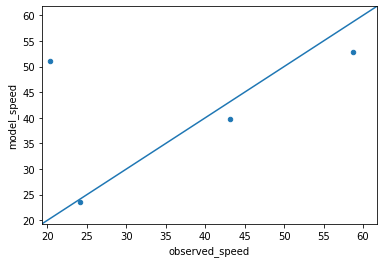

In [48]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df = df.loc[df.subarea_flag==1]
ax = df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [49]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
85,Tukwila to Bellevue - NB,51,20
49,Seattle to Tacoma - SB,53,59
103,Bellevue to Tukwila - SB,40,43
31,Tacoma to Seattle - NB,24,24


## Other Counties

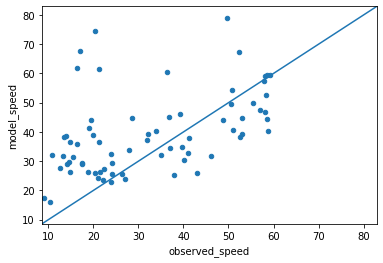

In [50]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df = df.loc[df.subarea_flag!=1]
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
ax = df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [51]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
510,"SR 529/Broadway/State, 88th St NE to 41st St - SB",75,20
354,"56th Street/Cirque, Alaska to Bridgeport - WB",68,17
363,"56th Street/Cirque, Bridgeport to Alaska - EB",62,16
328,"15th Ave/Elliott, Western Ave to NW 80th St - NB",61,21
263,"SR 522, I-405 to SR 2 - EB",79,50
417,"Bel-Red Road, 124th Ave NE to West Lk Samm - EB",38,13
480,"SR 169, Green Valley Rd to I-405 - NB",44,20
336,"23rd Ave, Rainier Ave S to SR 520 - NB",38,14
323,"SR 9, SR 522 to SR 531 - NB",61,36
498,"SR 161, SR 18 to 264th St - SB",42,19


### PM Peak, Primary Corridors

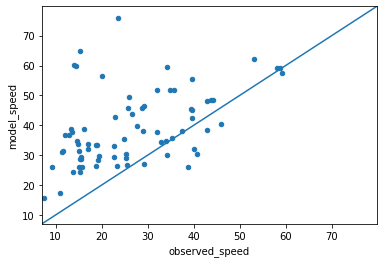

In [52]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
ax = df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [53]:
df[df['tod'] == '16to17'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
297,"SR 522, I-405 to SR 2 - EB",76,24
385,"56th Street/Cirque, Alaska to Bridgeport - WB",65,15
394,"56th Street/Cirque, Bridgeport to Alaska - EB",60,14
362,"15th Ave/Elliott, Western Ave to NW 80th St - NB",60,14
355,"SR 9, SR 522 to SR 531 - NB",56,20
529,"SR 161, SR 18 to 264th St - SB",39,13
328,"SR 3, SR 303 to Loxie Eagans - SB",59,34
475,"Kitsap Way/Callow/Burwell, Ferry Terminal to A...",37,12
367,"23rd Ave, Rainier Ave S to SR 520 - NB",38,14
448,"Bel-Red Road, 124th Ave NE to West Lk Samm - EB",37,13


## City of SeaTac

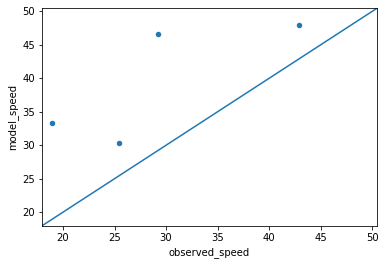

In [54]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df = df.loc[df.subarea_flag==1]
ax = df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [55]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
75,Tukwila to Bellevue - NB,47,29
93,Bellevue to Tukwila - SB,33,19
21,Tacoma to Seattle - NB,48,43
39,Seattle to Tacoma - SB,30,25


## Other

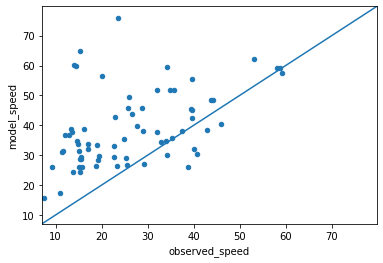

In [56]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df = df.loc[df.subarea_flag!=1]
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
ax = df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [57]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
261,"SR 522, I-405 to SR 2 - EB",76,24
349,"56th Street/Cirque, Alaska to Bridgeport - WB",65,15
358,"56th Street/Cirque, Bridgeport to Alaska - EB",60,14
326,"15th Ave/Elliott, Western Ave to NW 80th St - NB",60,14
319,"SR 9, SR 522 to SR 531 - NB",56,20
493,"SR 161, SR 18 to 264th St - SB",39,13
292,"SR 3, SR 303 to Loxie Eagans - SB",59,34
439,"Kitsap Way/Callow/Burwell, Ferry Terminal to A...",37,12
331,"23rd Ave, Rainier Ave S to SR 520 - NB",38,14
412,"Bel-Red Road, 124th Ave NE to West Lk Samm - EB",37,13
